**Demo for how we get the dimensions of image given a rotation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set desired max degree of rotation (x,y,z). Rotating from -180 to 180 every 10, so max is 50 or 40.

In [2]:
a, b, c = 0,0,-10

#Compute sin and cos for applying rotation once, np takes angle in radians
a_rad, b_rad, c_rad = np.radians(a), np.radians(b), np.radians(c)

cos_a, cos_b, cos_c = np.cos(a_rad), np.cos(b_rad), np.cos(c_rad)
sin_a, sin_b, sin_c  = np.sin(a_rad), np.sin(b_rad), np.sin(c_rad)

print(cos_a, cos_b, cos_c)
print(sin_a, sin_b, sin_c)

1.0 1.0 0.984807753012208
0.0 0.0 -0.17364817766693033


Demo dimension for an image is [512, 512, 100]

In [3]:
dimension = [512,512,100]

x, y, z = dimension[0], dimension[1], dimension[2]

Plot the original image space

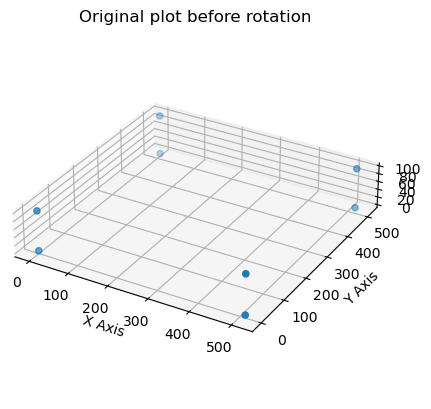

In [4]:
#Generate 8 corner points
x_list = [0,x,x,0,0,x,x,0]
y_list = [0,0,0,0,y,y,y,y]
z_list = [0,0,z,z,0,0,z,z]

#Three-dimensional scattered plot centered

ax = plt.axes(projection='3d')
ax.scatter3D(x_list, y_list, z_list)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Original plot before rotation")
ax.set_aspect(aspect = 'equal')


Plot the image centered at the origin

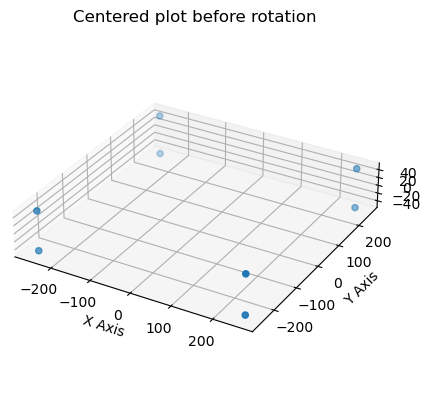

In [5]:
#Rotating about the center, dimensions given as height and width in first quadrant
center = np.divide(dimension,2)
x, y, z = center[0], center[1], center[2] #This gives coordinate in first quadrant

#Generate distance to corner (x,y,z)
x_list = [x,x,x,x,-x,-x,-x,-x]
y_list = [y,y,-y,-y,y,y,-y,-y]
z_list = [z,-z,z,-z,z,-z,z,-z]

#Three-dimensional scattered plot centered
ax = plt.axes(projection='3d')
ax.scatter3D(x_list, y_list, z_list)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Centered plot before rotation")
ax.set_aspect(aspect = 'equal')

Get distance from origin to most distant corner. 

In [6]:
dist_list = np.zeros(8)
for i in range(8):
    x1, y1, z1 = x_list[i], y_list[i], z_list[i]
    p1 = np.array([0,0,0])
    p2 = np.array([x1,y1,z1])

    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)

    dist_list[i] = dist
max_dist = np.max(dist)
print(dist_list)
print(max_dist)

[365.47503335 365.47503335 365.47503335 365.47503335 365.47503335
 365.47503335 365.47503335 365.47503335]
365.47503334701264


Generate rotated coordinates

In [7]:
x1_list, y1_list, z1_list = np.zeros(8), np.zeros(8), np.zeros(8)

for i in range(8):
    x1, y1, z1 = x_list[i], y_list[i], z_list[i]

    #Apply z rotation
    x2 = x1*cos_c - y1*sin_c
    y2 = y1*cos_c + x1*sin_c
    z2 = z1
    
    #Create lists of rotated coordinates
    x1_list[i], y1_list[i], z1_list[i] = x2, y2, z2
print("x1_list:", x1_list)
print("y1_list:",y1_list)
print("z1_list:", z1_list)

x1_list: [ 296.56471825  296.56471825  207.65685129  207.65685129 -207.65685129
 -207.65685129 -296.56471825 -296.56471825]
y1_list: [ 207.65685129  207.65685129 -296.56471825 -296.56471825  296.56471825
  296.56471825 -207.65685129 -207.65685129]
z1_list: [ 50. -50.  50. -50.  50. -50.  50. -50.]


Plot the rotated coordinates

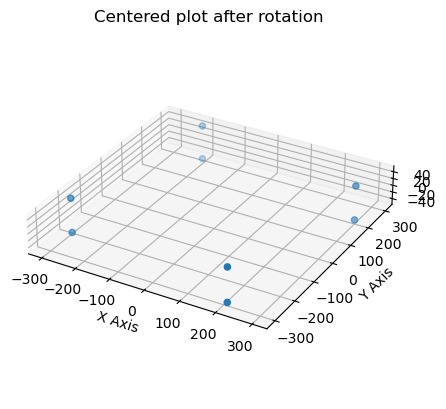

In [8]:
#Three-dimensional scattered plot centered
ax = plt.axes(projection='3d')
ax.scatter3D(x1_list, y1_list, z1_list)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Centered plot after rotation")
ax.set_aspect(aspect = 'equal')

Now, we compute the dimensions of the bounding box in which the above coordinates can fit. 

In [9]:
x1_list, y1_list, z1_list = abs(x1_list), abs(y1_list), abs(z1_list)
x_dim, y_dim, z_dim = 2*x1_list.max(), 2*y1_list.max(), 2*z1_list.max()

print(x_dim, y_dim, z_dim)

593.1294365077189 593.1294365077189 100.0


We round up, so our dimensions for our degree rotations will be (722, 722, z) where z comes from the original dimension.

We round up, so our dimensions for -10 to 10 degree rotation is (594,594,z) where z comes from the original dimension.